* * *
<pre> NYU Paris            <i> Machine Learning - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab: Dimension Reduction </h1>

<pre align="left"> June 13th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goals:
- Understand PCA deeply and see when it can be useful or not 
- Evaluate other dimension reduction methods

In [1]:
import numpy as np
from matplotlib import pyplot as plt

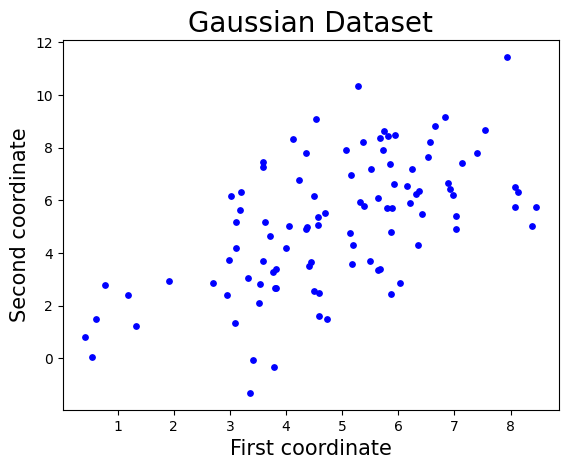

In [3]:
# Sample one dataset with (correlated) Gaussian distribution
np.random.seed(0)

# Size of data
n_samples = 100
n_dim = 2

# Mean vector of the dataset
mean = 5 *  np.ones(n_dim)

# Sample covariance matrix from a Wishart distribution 
temp = np.random.randn(n_dim, n_dim)
cov = temp@temp.T

X = np.random.multivariate_normal(mean, cov, size=n_samples)

plt.scatter(X[:, 0], X[:, 1], s=15, c='b')
plt.xlabel('First coordinate', size=15)
plt.ylabel('Second coordinate', size=15)
plt.title('Gaussian Dataset', size=20)
plt.show()

### Question 1: 

Implement your own PCA algorithm.

In [4]:
class MyPCA(object):
    
    def __init__(self, n_components):
        self.n_components = n_components


    def fit(self, X):
        cov_matrix = np.cov(X.T)
        eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
        
        #sort the eigenvalues in descending order
        sorted_index = np.argsort(eigen_values)[::-1]
 
        self.eigenvalues = eigen_values[sorted_index]
    
        #similarly sort the eigenvectors 
        self.eigenvectors = eigen_vectors[:, sorted_index]
        self.eigenvector_subset = self.eigenvectors[:, :self.n_components]


    def transform(self, Z):
        return np.dot(Z, self.eigenvector_subset)

### Question 2

Apply PCA on the Gaussian dataset

In [323]:
import matplotlib.pyplot as plt

# Defining the PCA object with desired number of components
pca = MyPCA(n_components=2)

# Fitting PCA to the data
pca.fit(X)

# Transforming the data into the reduced dimensionality
X_transformed = pca.transform(X)


### Question 3

Verify that your transformed data are decorrelated. What do you observe?

In [324]:
# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(X_transformed, rowvar=False)

print("Correlation coefficient between transformed features:")
print(correlation_coefficient)


Correlation coefficient between transformed features:
[[ 1.00000000e+00 -2.74878068e-16]
 [-2.74878068e-16  1.00000000e+00]]


The correlation coefficient matrix above indicates that the transformed features are decorrelated. This is because in a decorrelated dataset, the off-diagonal elements of the correlation coefficient matrix should ideally be close to zero, while the diagonal elements should be equal to 1.

### Question 4

Visualize your transformed data after PCA.

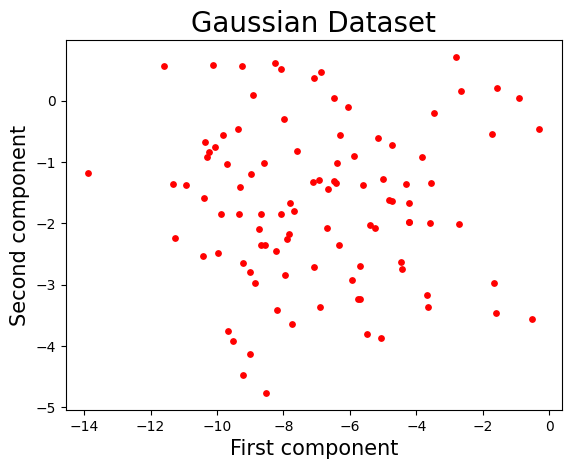

In [325]:
# to do
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=15, c='r')
plt.xlabel('First component', size=15)
plt.ylabel('Second component', size=15)
plt.title('Gaussian Dataset', size=20)
plt.show()

### Question 4bis

Visualize PCA components in your original orthornormed reference frame (Plot the data, and the components-axes).

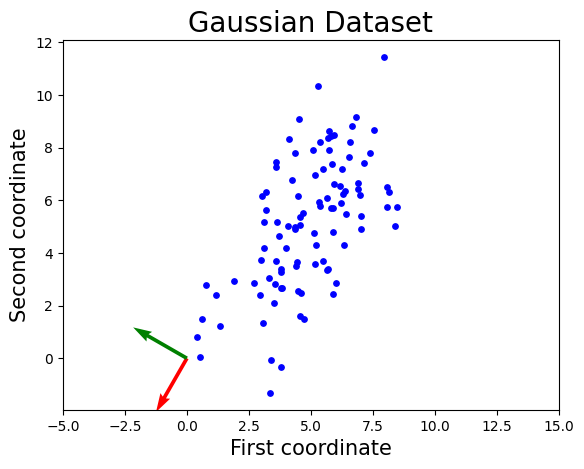

In [326]:
origin = np.array([[0, 0],[0, 0]])
V = pca.eigenvectors

plt.scatter(X[:, 0], X[:, 1], s=15, c='b')
plt.quiver(*origin, V[:,0], V[:,1], color=['r','g'], scale=8)
plt.xlabel('First coordinate', size=15)
plt.ylabel('Second coordinate', size=15)
plt.title('Gaussian Dataset', size=20)
plt.xlim(-5, 15)
plt.show()

### Question 5

Compare your algorithm with the one in sklearn. You can check the covariance matrix of the transformed data. Is this the same than yours? What do you observe?

In [17]:
from sklearn.decomposition import PCA

In [27]:
# Fitting PCA using scikit-learn
sklearn_pca = PCA(n_components=2)
sklearn_pca.fit(X)

# Transforming data using scikit-learn's PCA
X_transformed_sklearn = sklearn_pca.transform(X)

# Comparing covariance matrices
cov_matrix_custom = np.cov(X_transformed.T)
cov_matrix_sklearn = np.cov(X_transformed_sklearn.T)

print("Covariance matrix of transformed data (Custom PCA):\n", cov_matrix_custom)
print("\nCovariance matrix of transformed data (Scikit-learn PCA):\n", cov_matrix_sklearn)


Covariance matrix of transformed data (Custom PCA):
 [[ 7.78619202e+00 -9.91537122e-16]
 [-9.91537122e-16  1.67113936e+00]]

Covariance matrix of transformed data (Scikit-learn PCA):
 [[7.78619202e+00 6.28464895e-16]
 [6.28464895e-16 1.67113936e+00]]


The diagonal values are the same for both the matrices (indicating the same variance), the off-diagonal elements (the covariance) are very close to zero in both the cases, indicating that the transformed features are largely uncorrelated, which is a desirable property of PCA.
There are slight numerical differences in the off-diagonal elements between the two covariance matrices. However, these differences are negligible and can probably be attributed to numerical precision or rounding differences in the implementations.

### Bonus Question

Compare the computational time of both algorithms, what do you observe? Why?

In [28]:
import time

In [85]:
# Time custom PCA
start_time_custom = time.time()
pca_custom = MyPCA(n_components=2)
pca_custom.fit(X)
X_transformed_custom = pca_custom.transform(X)
end_time_custom = time.time()
time_custom = end_time_custom - start_time_custom

# Time scikit-learn PCA
start_time_sklearn = time.time()
sklearn_pca = PCA(n_components=2)
X_transformed_sklearn = sklearn_pca.fit_transform(X)
end_time_sklearn = time.time()
time_sklearn = end_time_sklearn - start_time_sklearn

print("Time taken for custom PCA: {:.6f} seconds".format(time_custom))
print("Time taken for scikit-learn PCA: {:.6f} seconds".format(time_sklearn))


Time taken for custom PCA: 0.000548 seconds
Time taken for scikit-learn PCA: 0.000533 seconds


The computational time for both the custom PCA implementation and scikit-learn's PCA is very similar, with the custom PCA taking slightly longer (0.000548 seconds) compared to scikit-learn's PCA (0.000533 seconds). This indicates that they're both working very efficiently. But since scikit-learn involves a lot more underlying optimization algorithms, the scikit-learn PCA takes slightly less time.

### Question 6

Let's apply the PCA on a (easy) classification real-world dataset. Apply PCA with 2 components and visualize the dataset with different colors for each class.

In [86]:
from sklearn import datasets

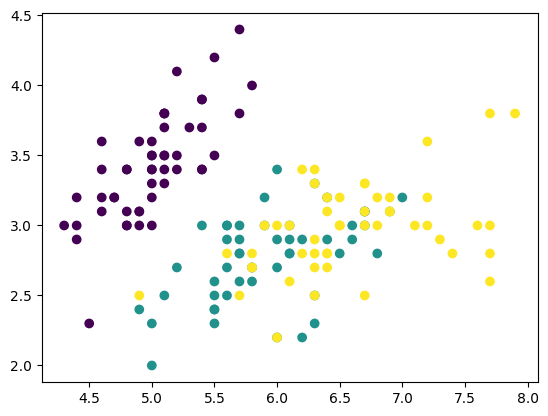

In [87]:
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target

plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.show()

In [91]:
from sklearn.decomposition import PCA

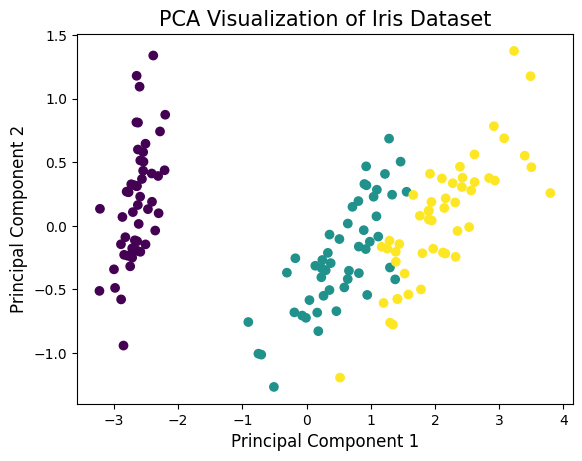

In [149]:
# Applying PCA with 2 components
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_iris)

# Plotting the transformed data with different colors for each class
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_iris)
plt.xlabel('Principal Component 1', size=12)
plt.ylabel('Principal Component 2', size=12)
plt.title('PCA Visualization of Iris Dataset', size=15)
plt.show()

### Question 7

Use a KNN algorithm and perform it on the dataset. Use different combinations of parameters using the GridSearchCV function.

In [150]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)

# Defining the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Creating a KNN classifier
knn = KNeighborsClassifier()

# Performing grid search using GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Printing the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

# Predicting on the test set with the best model
y_pred = grid_search.predict(X_test)

# Computing accuracy score 
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)


Accuracy Score: 0.9473684210526315


### Question 8

Use a PCA first and then apply again the classification algorithm. Observe the best score, is the PCA improve the results? Which explanation can you give?

In [152]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [164]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Defining the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Performing grid search using GridSearchCV with PCA-transformed data
knn_pca = KNeighborsClassifier()
grid_search_pca = GridSearchCV(knn_pca, param_grid, cv=5, scoring='accuracy')
grid_search_pca.fit(X_train_pca, y_train)

# Printing the best parameters found by GridSearchCV
print("Best parameters with PCA:", grid_search_pca.best_params_)

# Predicting on the test set with the best model
y_pred_pca = grid_search_pca.predict(X_test_pca)

# Computing accuracy score with PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("\nAccuracy Score with PCA:", accuracy_pca)

# Performing grid search using GridSearchCV without PCA
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Printing the best parameters found by GridSearchCV
print("\nBest parameters without PCA:", grid_search.best_params_)

# Predicting on the test set with the best model
y_pred = grid_search.predict(X_test)

# Computing accuracy score with PCA
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score without PCA:", accuracy)


Accuracy Score with PCA: 0.9736842105263158

Accuracy Score without PCA: 0.9473684210526315


The accuracy score with PCA (0.9737) is higher than the accuracy score without PCA (0.9474). This suggests that PCA has improved the classification results. By projecting the data onto a lower-dimensional subspace of 2 components, PCA helped reduce the effects of the curse of dimensionality and improved the generalization ability of the classifier. Overall, PCA as a preprocessing step helped enhance the performance of the classification algorithm by reducing dimensionality, filtering noise, and improving separability, as observed in the higher accuracy score obtained when using PCA compared to without PCA.

### Question 9

How features influence the first components (in term of variance)? You can answer this question by inspecting the weights in the first component. 

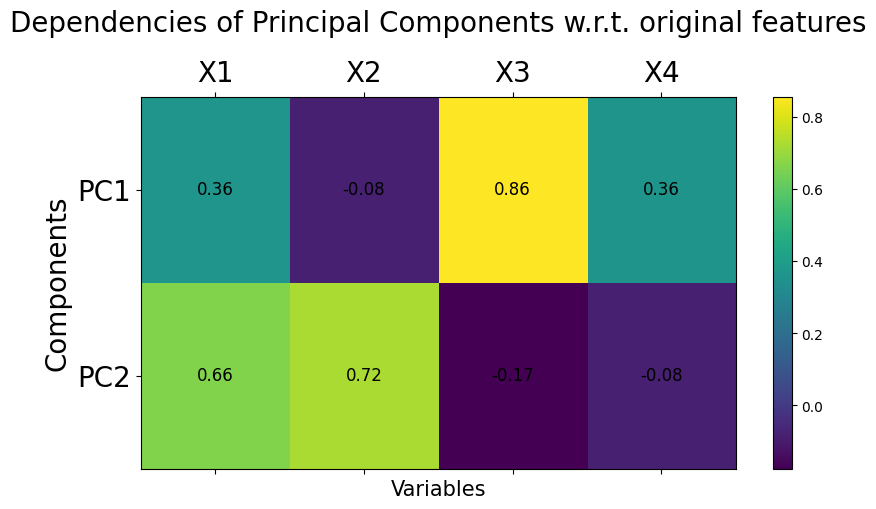

In [165]:
plt.matshow(pca.components_, cmap='viridis', aspect='auto')
plt.ylabel('Components', size=20)
plt.xlabel('Variables', size=15)
for i in range(4):
    for j in range(2):
        plt.text(i, j, "%0.2f" % pca.components_[j, i], size=12, color='black', ha="center", va="center")
plt.colorbar()
xlabels = ['X1', 'X2', 'X3', 'X4']
plt.xticks(range(4), xlabels, size=20)
ylabels = ['PC1', 'PC2']
plt.yticks(range(2), ylabels, size=20)
plt.title('Dependencies of Principal Components w.r.t. original features', size=20, pad=20)
plt.show()

X3 has a significant influence on PC1. Features with higher absolute weights contribute more to the corresponding principal component. X2 has the least influence on PC2.
The sign of the weight indicates the direction of influence.
Positive weights imply a positive correlation between the original feature and the principal component, while negative weights imply a negative correlation.

### Bonus Question

Create a pipeline with KNN, classification trees, RandomForest and SVM. Perform the Question 7/8 for these 4 classifiers. What do you observe?

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Defining classifiers
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
svm = SVC()

# Creating a pipeline for each classifier
knn_pipe = Pipeline([('knn', knn)])
tree_pipe = Pipeline([('tree', tree)])
forest_pipe = Pipeline([('forest', forest)])
svm_pipe = Pipeline([('svm', svm)])

# Defining parameter grids for each classifier
param_grid_knn = {'knn__n_neighbors': [3, 5, 7, 9], 'knn__weights': ['uniform', 'distance'], 'knn__p': [1, 2]}
param_grid_tree = {'tree__max_depth': [None, 10, 20, 30]}
param_grid_forest = {'forest__n_estimators': [50, 100, 200], 'forest__max_depth': [None, 10, 20, 30]}
param_grid_svm = {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear', 'rbf']}

# List of pipelines and parameter grids
pipelines = [knn_pipe, tree_pipe, forest_pipe, svm_pipe]
param_grids = [param_grid_knn, param_grid_tree, param_grid_forest, param_grid_svm]
classifier_names = ['KNN', 'Decision Tree', 'Random Forest', 'SVM']

# Looping over each classifier and perform grid search
for pipeline, param_grid, classifier_name in zip(pipelines, param_grids, classifier_names):
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)
    
    # Performing grid search using GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Printing the best parameters found by GridSearchCV
    print(f"Best parameters for {classifier_name}:", grid_search.best_params_)
    
    # Predicting on the test set with the best model
    y_pred = grid_search.predict(X_test)
    
    # Computing accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score for {classifier_name}: {accuracy:.4f}\n")


Best parameters for KNN: {'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}
Accuracy Score for KNN: 0.9474

Best parameters for Decision Tree: {'tree__max_depth': 20}
Accuracy Score for Decision Tree: 0.8947

Best parameters for Random Forest: {'forest__max_depth': None, 'forest__n_estimators': 50}
Accuracy Score for Random Forest: 0.9211

Best parameters for SVM: {'svm__C': 0.1, 'svm__kernel': 'linear'}
Accuracy Score for SVM: 0.9737



The accuracy scores vary among different classifiers, with SVM achieving the highest accuracy score (0.9737) followed by KNN (0.9474), Random Forest (0.9211), and Decision Tree (0.8947).
SVM with a linear kernel outperforms other classifiers in terms of accuracy on this dataset.
KNN performs reasonably well with a competitive accuracy score.
Random Forest and Decision Tree classifiers achieve lower accuracy compared to SVM and KNN.
The choice of parameters significantly affects the performance of each classifier. Grid search optimization helps find the best parameters for each algorithm, contributing to improved accuracy scores.
Overall, SVM with a linear kernel demonstrates the best performance among the tested classifiers on this dataset.

### Question 10

Time to apply PCA on a high dimensional dataset.

In [253]:
from sklearn.datasets import load_digits
digits = load_digits()
X_d = digits.data
y_d = digits.target

print(X_d.shape)

(1797, 64)


### Question 11

Now, you will have to reduce the dimension. The main question is: how to choose the number of components? 


Perform a PCA with a high number of components and inspect the explained variance. Which number of components do you suggest?

In [281]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Performing PCA with a high number of components
pca = PCA(n_components=64) 
X_pca = pca.fit_transform(X_d)

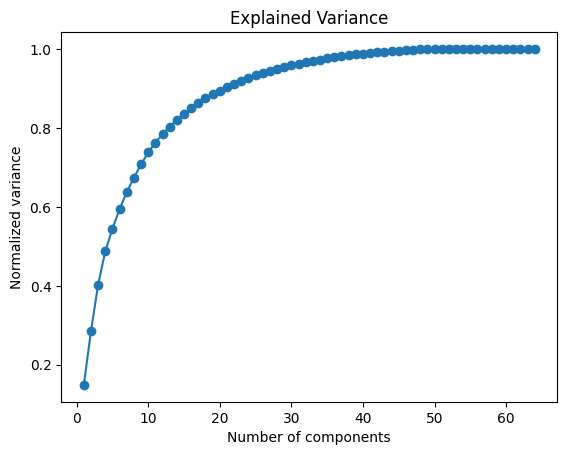

In [282]:
plt.plot(range(1, 65), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.title('Explained Variance')
plt.ylabel('Normalized variance')
plt.xlabel('Number of components')
plt.show()

Looking at the graph, for retaining a 95% normalized variance, I'd choose 26 components. This means that reducing the dimensionality to 26 components retains most of the information present in the original dataset while significantly reducing its dimensionality. This choice strikes a balance between retaining information and reducing complexity, making it a suitable option for further analysis or modeling tasks.

### Question 12

Run PCA on the handwritten digits data reducing its dimension from 64 to 2. Visualise digits in dimension two. Is dimension two seems enough to represent keep information of data?

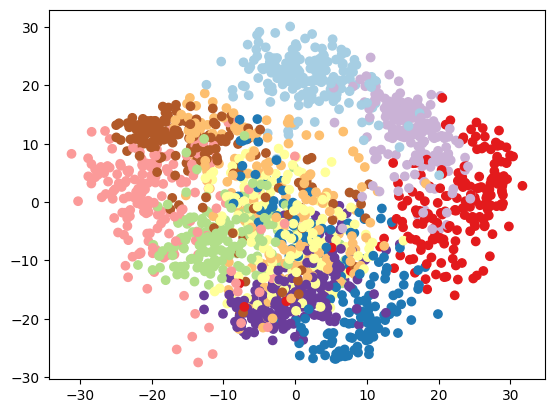

In [319]:
from matplotlib import cm

# Performing PCA to reduce dimensionality from 64 to 2
pca = PCA(n_components=2)
vis = pca.fit_transform(X_d)

colors = cm.Paired(np.linspace(0., 1., 10))

colors_all = colors[digits.target]
plt.scatter(vis[:, 0], vis[:, 1], c=colors_all)
plt.show()

For certain digits, there is good classification, but overall there is a lot of overlap for certain digits and it suggests that two dimensions may not be sufficient to capture all the variations present in the data.

### Question 13

Perform a KNN algorithm on the raw data and on the projected data. What do you observe in terms of accuracy?

In [322]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Spliting the raw data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_d, y_d)

# Creating a KNN classifier for raw data
knn_raw = KNeighborsClassifier()
knn_raw.fit(X_train_raw, y_train)

# Predicting on the test set using raw data
y_pred_raw = knn_raw.predict(X_test_raw)

# Computing accuracy score for raw data
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print("Accuracy Score for raw data (before PCA):", accuracy_raw)


# Splitting the projected data into training and testing sets
X_train_pca, X_test_pca, _, _ = train_test_split(vis, y_d)

# Creating a KNN classifier for projected data
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)

# Predicting on the test set using projected data
y_pred_pca = knn_pca.predict(X_test_pca)

# Compute accuracy score for projected data
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy Score for projected data (after PCA):", accuracy_pca)

Accuracy Score for raw data (before PCA): 0.9822222222222222
Accuracy Score for projected data (after PCA): 0.10888888888888888


The accuracy significantly drops when applying KNN on the data after PCA compared to using the raw data directly. This drop in accuracy suggests that the reduced-dimensional representation obtained through PCA may not preserve enough discriminative information for effective classification using a simple algorithm like KNN. While dimensionality reduction techniques like PCA can help in visualizing high-dimensional data and reducing computational complexity, they may also lead to information loss, which can impact the performance of downstream tasks such as classification.

### Bonus Question

Apply other reduction dimension methods such as Kernel PCA (choose one kernel), Independant Component Analysis (ICA) and t-SNE. Visualize their projection in dimension two.

In [268]:
from sklearn.decomposition import FastICA, PCA, KernelPCA
from sklearn.manifold import TSNE

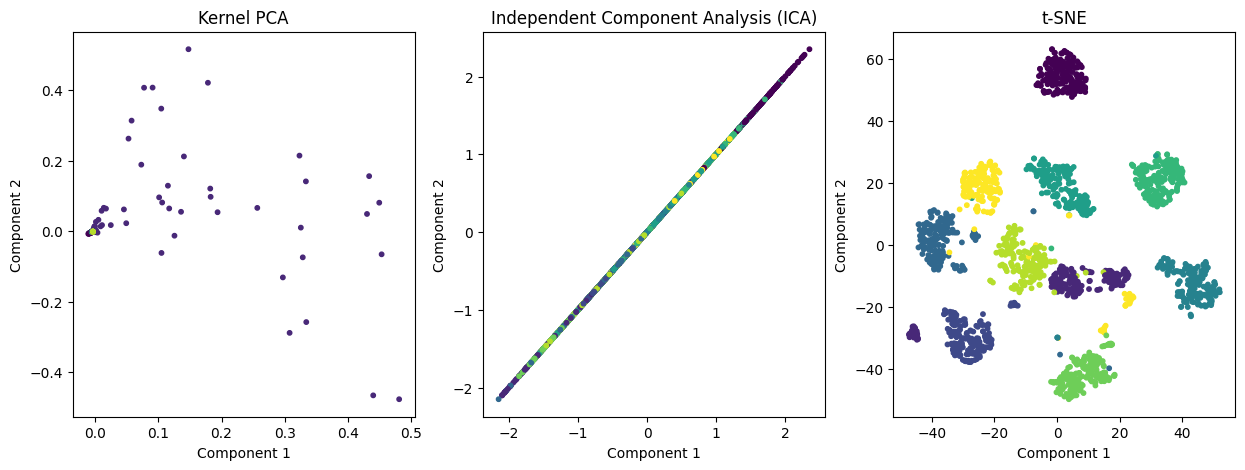

In [272]:
from sklearn.decomposition import KernelPCA, FastICA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Applying Kernel PCA with a chosen kernel
kpca = KernelPCA(n_components=2, kernel='rbf')  # Choose the RBF kernel
X_kpca = kpca.fit_transform(X_d)

# Applying Independent Component Analysis (ICA)
ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X_d)

# Applying t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_d)

# Visualizing projections
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_d, cmap='viridis', s=10)
plt.title('Kernel PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.subplot(1, 3, 2)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=y_d, cmap='viridis', s=10)
plt.title('Independent Component Analysis (ICA)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.subplot(1, 3, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_d, cmap='viridis', s=10)
plt.title('t-SNE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()
